<a href="https://colab.research.google.com/github/WanjaWhoopie/Credit-Scoring/blob/main/Scoring_Tool_Dash_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Installation**

In [ ]:
pip install dash

In [ ]:
pip install pandas

In [ ]:
import pandas as pd

In [ ]:
pip install matplotlib

In [ ]:
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import plotly.express as px

import numpy as np
import seaborn as sns
from ipywidgets import widgets, interactive

# **Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
  df = pd.read_csv("/content/drive/MyDrive/AICE/Scoring Tool/loan_data.csv")

# **Summary**

## **Columns and Rows**

In [ ]:
print("Number of Columns: ", len(df.columns))

Number of Columns:  32


In [ ]:
print("Number of Rows: ", len(df.index))

Number of Rows:  21720


## **Summary table**

In [ ]:
 check_unique = df.nunique()

In [ ]:
check_unique = pd.DataFrame(check_unique.reset_index().values, columns=['Column','Unique Count'])
check_unique.head()

,Column,Unique Count
0,ORIGINAL LOAN AMOUNT,16404
1,ORIGINAL TERM,5
2,INTEREST RATE,11
3,CREDIT SCORE,311
4,DEBT TO INCOME,6678


In [ ]:
check_null = df.isnull().sum()

In [ ]:
check_null = pd.DataFrame(check_null.reset_index().values, columns=['Column',"# Missing"])
check_null.head()

,Column,# Missing
0,ORIGINAL LOAN AMOUNT,0
1,ORIGINAL TERM,0
2,INTEREST RATE,0
3,CREDIT SCORE,0
4,DEBT TO INCOME,0


In [ ]:
df.describe()

,ORIGINAL LOAN AMOUNT,ORIGINAL TERM,INTEREST RATE,CREDIT SCORE,DEBT TO INCOME,LAST PAYMENT AMOUNT,PAYMENT AMOUNT,CURRENT BALANCE,UNAPPLIED CASH,DELINQUENT AMOUNT,TOTAL INTEREST PAID,TOTAL LATE CHARGE PAID,PAYMENTS REMAINING,DAYS DELINQUENT,INSTALLATION ZIP,Months Since Origination,Payments Made,CONTRACT DATE year,SETUP DATE year,ORIGINAL MATURITY DATE year,CURRENT MATURITY DATE year,ACCOUNT CODE DATE year,Loan Status
count,21720.000000,21720.000000,21720.000000,21720.000000,21720.000000,21720.000000,21720.000000,21720.000000,21720.000000,21720.000000,21720.000000,21720.000000,21720.000000,21720.000000,21720.000000,21720.000000,21720.000000,21720.000000,21720.000000,21720.000000,21720.000000,21720.000000,21720.000000
mean,11954.540067,167.738996,3.658002,737.069061,0.315781,501.204033,93.401574,9112.288290,2.353442,41.460955,889.484151,3.066602,122.102804,-8.191943,12702.233287,33.831303,45.636192,2014.897238,2014.916206,2028.874908,2027.685866,2015.304006,0.871455
std,6746.737439,32.542538,0.684272,53.813544,0.299975,2160.336578,53.039500,6746.055321,15.842952,333.861575,680.001480,16.031206,56.404675,126.005500,1304.026067,19.588553,45.322799,1.655748,1.656427,3.469183,5.159921,1.580646,0.334703
min,701.000000,60.000000,2.990000,479.000000,0.000000,0.010000,5.010000,0.000000,0.000000,-421.460000,-98.660000,0.000000,0.000000,-1875.000000,10026.000000,0.700000,0.000000,2010.000000,2010.000000,2015.000000,2011.000000,2010.000000,0.000000
25%,6300.922500,180.000000,3.490000,702.000000,0.191000,54.575000,51.067500,3720.247500,0.000000,0.000000,374.735000,0.000000,107.875000,-29.000000,11735.000000,19.600000,19.000000,2014.000000,2014.000000,2028.000000,2027.000000,2015.000000,1.000000
50%,10792.010000,180.000000,3.490000,749.000000,0.302400,92.840000,85.110000,7952.405000,0.000000,0.000000,729.345000,0.000000,147.000000,-20.000000,12510.500000,29.600000,30.000000,2015.000000,2015.000000,2030.000000,2030.000000,2016.000000,1.000000
75%,16677.355000,180.000000,3.490000,781.000000,0.421225,150.000000,128.597500,13639.185000,0.000000,0.000000,1257.610000,0.000000,160.000000,-7.000000,14058.250000,45.700000,55.900000,2016.000000,2016.000000,2031.000000,2031.000000,2016.000000,1.000000
max,25000.000000,180.000000,8.490000,837.000000,36.085000,25525.110000,454.680000,25000.000000,421.460000,11799.170000,5086.810000,385.000000,180.000000,2473.000000,14905.000000,88.500000,180.000000,2018.000000,2018.000000,2033.000000,2033.000000,2018.000000,1.000000


In [ ]:
Summary_Table = df.describe(include='all').T
Summary_Table.columns

Index(['count', 'unique', 'top', 'freq', 'mean', 'std', 'min', '25%', '50%',
       '75%', 'max'],
      dtype='object')

In [ ]:

Summary_Table = Summary_Table.reset_index()

In [ ]:
Summary_Table.rename(columns = {'index': 'Column'}, inplace = True)
Summary_Table

,Column,count,unique,top,freq,mean,std,min,25%,50%,75%,max
0,ORIGINAL LOAN AMOUNT,21720,NaN,NaN,NaN,11954.5,6746.74,701,6300.92,10792,16677.4,25000
1,ORIGINAL TERM,21720,NaN,NaN,NaN,167.739,32.5425,60,180,180,180,180
2,INTEREST RATE,21720,NaN,NaN,NaN,3.658,0.684272,2.99,3.49,3.49,3.49,8.49
3,CREDIT SCORE,21720,NaN,NaN,NaN,737.069,53.8135,479,702,749,781,837
4,DEBT TO INCOME,21720,NaN,NaN,NaN,0.315781,0.299975,0,0.191,0.3024,0.421225,36.085
5,LAST PAYMENT AMOUNT,21720,NaN,NaN,NaN,501.204,2160.34,0.01,54.575,92.84,150,25525.1
6,PAYMENT AMOUNT,21720,NaN,NaN,NaN,93.4016,53.0395,5.01,51.0675,85.11,128.597,454.68
7,CURRENT BALANCE,21720,NaN,NaN,NaN,9112.29,6746.06,0,3720.25,7952.41,13639.2,25000
8,UNAPPLIED CASH,21720,NaN,NaN,NaN,2.35344,15.843,0,0,0,0,421.46
9,DELINQUENT AMOUNT,21720,NaN,NaN,NaN,41.461,333.862,-421.46,0,0,0,11799.2


In [ ]:
#Summary_Table.merge( check_unique, left_on='Column')

newdf = pd.merge(Summary_Table, check_unique, on='Column', how='inner')


In [ ]:
#Summary_Table.merge( check_unique, left_on='Column')

newdf = pd.merge(newdf, check_null, on='Column', how='inner')


In [ ]:
newdf.drop('unique', axis=1, inplace=True)
newdf.head()

,Column,count,top,freq,mean,std,min,25%,50%,75%,max,Unique Count,# Missing
0,ORIGINAL LOAN AMOUNT,21720,NaN,NaN,11954.5,6746.74,701,6300.92,10792,16677.4,25000,16404,0
1,ORIGINAL TERM,21720,NaN,NaN,167.739,32.5425,60,180,180,180,180,5,0
2,INTEREST RATE,21720,NaN,NaN,3.658,0.684272,2.99,3.49,3.49,3.49,8.49,11,0
3,CREDIT SCORE,21720,NaN,NaN,737.069,53.8135,479,702,749,781,837,311,0
4,DEBT TO INCOME,21720,NaN,NaN,0.315781,0.299975,0,0.191,0.3024,0.421225,36.085,6678,0


In [ ]:
def Summary_Table(df):
  check_unique = df.nunique()
  check_unique = pd.DataFrame(check_unique.reset_index().values, columns=['Column','Unique Count'])

  check_null = df.isnull().sum()
  check_null = pd.DataFrame(check_null.reset_index().values, columns=['Column',"# Missing"])

  Summary_Table = df.describe(include='all').T
  Summary_Table = Summary_Table.reset_index()
  Summary_Table.rename(columns = {'index': 'Column'}, inplace = True)

  newdf = pd.merge(Summary_Table, check_unique, on='Column', how='inner')
  newdf = pd.merge(newdf, check_null, on='Column', how='inner')

  newdf.drop('unique', axis=1, inplace=True)

  return newdf

In [ ]:
Summary_Table(df)

,Column,count,top,freq,mean,std,min,25%,50%,75%,max,Unique Count,# Missing
0,ORIGINAL LOAN AMOUNT,21720,NaN,NaN,11954.5,6746.74,701,6300.92,10792,16677.4,25000,16404,0
1,ORIGINAL TERM,21720,NaN,NaN,167.739,32.5425,60,180,180,180,180,5,0
2,INTEREST RATE,21720,NaN,NaN,3.658,0.684272,2.99,3.49,3.49,3.49,8.49,11,0
3,CREDIT SCORE,21720,NaN,NaN,737.069,53.8135,479,702,749,781,837,311,0
4,DEBT TO INCOME,21720,NaN,NaN,0.315781,0.299975,0,0.191,0.3024,0.421225,36.085,6678,0
5,LAST PAYMENT AMOUNT,21720,NaN,NaN,501.204,2160.34,0.01,54.575,92.84,150,25525.1,12604,0
6,PAYMENT AMOUNT,21720,NaN,NaN,93.4016,53.0395,5.01,51.0675,85.11,128.597,454.68,11355,0
7,CURRENT BALANCE,21720,NaN,NaN,9112.29,6746.06,0,3720.25,7952.41,13639.2,25000,18384,0
8,UNAPPLIED CASH,21720,NaN,NaN,2.35344,15.843,0,0,0,0,421.46,742,0
9,DELINQUENT AMOUNT,21720,NaN,NaN,41.461,333.862,-421.46,0,0,0,11799.2,1883,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


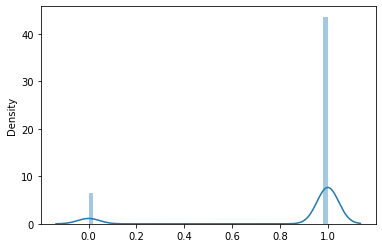

In [ ]:
#Target variable distribution
import seaborn as sns
sns.distplot(x = df['Loan Status'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


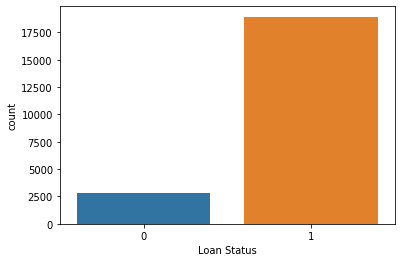

In [ ]:

sns.countplot(df['Loan Status'])

In [ ]:
data = df
class Data_summary():
        def __init__(self, data):
            self.data = data

        def cols_rows(self):
            #display rows and columns
            print("Number of Columns: ", len(self.data.columns))
            print("Number of Rows: ", len(self.data.index))

        #display summary statistics table
        def Summary_Table(self):
            check_unique = self.data.nunique()
            check_unique = pd.DataFrame(check_unique.reset_index().values, columns=['Column','Unique Count'])

            check_null = self.data.isnull().sum()
            check_null = pd.DataFrame(check_null.reset_index().values, columns=['Column',"# Missing"])

            Summary_Table = self.data.describe(include='all').T
            Summary_Table = Summary_Table.reset_index()
            Summary_Table.rename(columns = {'index': 'Column'}, inplace = True)

            newdf = pd.merge(Summary_Table, check_unique, on='Column', how='inner')
            newdf = pd.merge(newdf, check_null, on='Column', how='inner')

            newdf.drop('unique', axis=1, inplace=True)


            return newdf

summary = Data_summary(data)
data = summary.Summary_Table()
data.head()

,Column,count,top,freq,mean,std,min,25%,50%,75%,max,Unique Count,# Missing
0,ORIGINAL LOAN AMOUNT,21720,NaN,NaN,11954.5,6746.74,701,6300.92,10792,16677.4,25000,16404,0
1,ORIGINAL TERM,21720,NaN,NaN,167.739,32.5425,60,180,180,180,180,5,0
2,INTEREST RATE,21720,NaN,NaN,3.658,0.684272,2.99,3.49,3.49,3.49,8.49,11,0
3,CREDIT SCORE,21720,NaN,NaN,737.069,53.8135,479,702,749,781,837,311,0
4,DEBT TO INCOME,21720,NaN,NaN,0.315781,0.299975,0,0.191,0.3024,0.421225,36.085,6678,0


## **Target Variable Chart**

In [ ]:
var1 = widgets.Dropdown(
    options= list(df.columns),
    value='Loan Status',
    description='Pick variable:')
output = widgets.Output()

display(var1, output)

Dropdown(description='Pick variable:', index=31, options=('ORIGINAL LOAN AMOUNT', 'ORIGINAL TERM', 'INTEREST R…

Output()

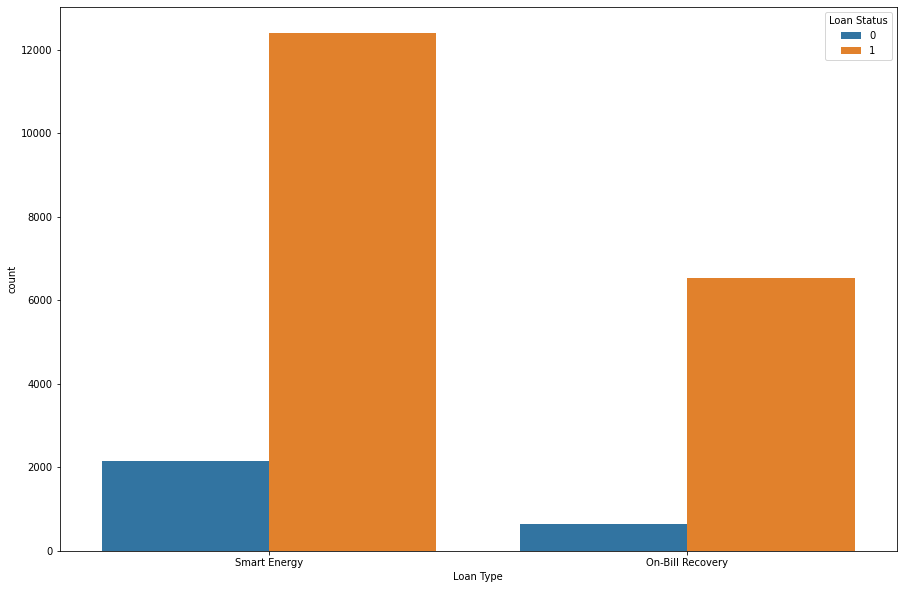

In [ ]:
variableX= 'Loan Type'
plt.figure(figsize=(15, 10))
graph = sns.countplot(x= variableX, data=df, hue= 'Loan Status')

In [ ]:
px.histogram(df, x=variableX, color="Loan Status")

In [ ]:
xc = len(df.select_dtypes(include=['category' , 'object']).columns)
xc

9

In [ ]:
xn = len(df.columns) -xc
xn

23

In [ ]:
df.stack().value_counts().head(20)

0.0                 68582
180                 20375
2016                20046
1                   19192
Tier 1              17939
3.49                17623
2015                15936
EE                  14743
Smart Energy        14555
2017                10978
A                   10668
2031                10621
2030                 8578
N                    8239
On-Bill Recovery     7165
2014                 7158
PV                   6906
31 days              6644
2032                 5803
2013                 5731
dtype: int64

In [ ]:
# def create_plot():
#   feature1 = widgets.Dropdown(
#       options= list(df.columns),
#       value='Loan Status',
#       description='Pick variable:')

#   plt.figure(figsize=(15, 10))
#   graph = sns.countplot(x= variableX, data=df, hue= 'Loan Status')


# widgets.interactive_output(create_plot, {'feature':feature1})


# **Opt Binning**

In [2]:
!pip install optbinning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.9/213.9 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.1/28.1 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.8/302.8 kB 12.4 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.5
    Uninstalling protobuf-4.25.5:
      Successfully uninstalled protobuf-4.25.5
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.17.1 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 5.26.1 which is incompatible.
tensorflow-metadata 1.13.

In [3]:
# import optbinning
from optbinning import OptimalBinning

(CVXPY) Nov 19 04:31:20 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.11.4210). Expected < 9.10.0. Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Nov 19 04:31:20 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.11.4210). Expected < 9.10.0. Please open a feature request on cvxpy to enable support for this version.')


In [ ]:
data = df.copy()

In [ ]:
from sklearn.model_selection import train_test_split
data_inputs_train, data_inputs_test, data_targets_train, data_targets_test = train_test_split(data.drop('Loan Status', axis = 1), data['Loan Status'], test_size = 0.2, random_state = 42)

In [ ]:
df_inputs_test = data_inputs_test
df_targets_test = data_targets_test

In [ ]:
variable = "ORIGINAL LOAN AMOUNT"
x = df_inputs_test[variable].values
y = df_targets_test

In [ ]:
optb = OptimalBinning(name=variable, dtype="numerical", solver="cp")

In [ ]:
optb.fit(x, y)

In [ ]:
optb.status

In [ ]:
optb.splits

In [ ]:
binning_table = optb.binning_table

In [ ]:
binning_table.build()

In [ ]:
type(binning_table)